In [1]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
# import train data sets
train_df = pd.read_csv('train.csv')
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# import test data set
test_df = pd.read_csv('test.csv')
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# checking for columns names in train_df
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# checking for information about train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking for Null numbers
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


##### From the table above, it is shown that there are some null values in the data set which must be replaced.

In [7]:
# observing unique values in the Age column
train_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
# calculate mean of Age column
train_df['Age'].mean()

29.69911764705882

In [9]:
# replacing null values in the Age column with the mean age
train_df['Age'].fillna(26.7, inplace=True)

In [10]:
# viewing the cabin column
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

#### We drop the Cabin coulmn since information there is not relevant to our analysis.

In [11]:
# Dropping the Cabin column
train_df.drop('Cabin', axis = 'columns', inplace = True)

In [12]:
# viewing the cleaned data set
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.7,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
# checking to see if there null numbers in the cleaned data set
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


#### It can be seen that the data set is now free from null values

# Univariate Analysis

### Passenger column

In [14]:
# viewing the passengerId column
train_df['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

#### it can be seen from the data above that every  value occurs once. Hence, every passenger has a unique Id number.

### Survived column

In [15]:
# viewing the number of survivors and non-survivors
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### From the data above, it can be seen that the number of non-survivors were more than the survivors.

### Pclass column

In [16]:
# viewing the different types of class that passengers joined
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

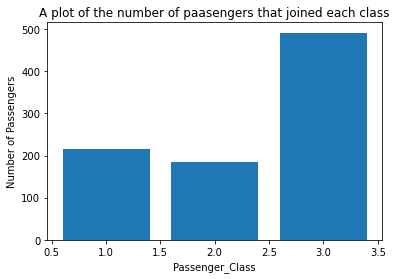

In [17]:
# plot of the number of passengers that joined each class
plt.bar(train_df['Pclass'].unique(), train_df['Pclass'].value_counts())
plt.title( 'A plot of the number of paasengers that joined each class')
plt.xlabel('Passenger_Class')
plt.ylabel('Number of Passengers')
plt.show()

#### There were 3 classes available for passengers to join. These are the 1st, 2nd and 3rd classes. The plot shows that, more passengers joined the 3rd class, followed by the 1st class and then the 2nd class.

In [18]:
# checking the correlation of the columns
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034916,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.061060,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.345800,0.083081,0.018443,-0.549500
Age,0.034916,-0.061060,-0.345800,1.000000,-0.233383,-0.167056,0.100415
SibSp,-0.057527,-0.035322,0.083081,-0.233383,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.167056,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.100415,0.159651,0.216225,1.000000


#### From the table above, it can be seen that, 'PassengerId' column has a very low correlation. Hence we remove it in addition to other irrelevant columns in our analysis.

In [19]:
# removing irrelavant coulmns
cleaned_train_df = train_df.drop(['Name', 'Ticket', 'Embarked'], axis = 'columns', inplace = True)
cleaned_train_df

In [20]:
# Renaming the data set
cleaned_train_df = train_df
cleaned_train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,26.7,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


### Sex column

In [21]:
# viewing the sexes and of passengers present on the ship
cleaned_train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

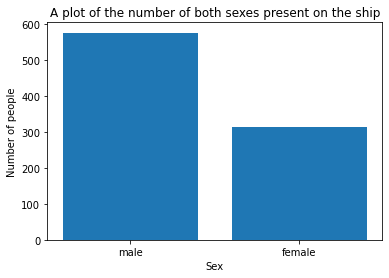

In [22]:
# viewing the number of both sexes present
plt.bar(cleaned_train_df['Sex'].unique(), cleaned_train_df['Sex'].value_counts())
plt.title('A plot of the number of both sexes present on the ship')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

#### From the plot above, it can be seen that, there were more males than females on the ship

### Age column

In [23]:
# finding the median age
cleaned_train_df['Age'].median()

26.7

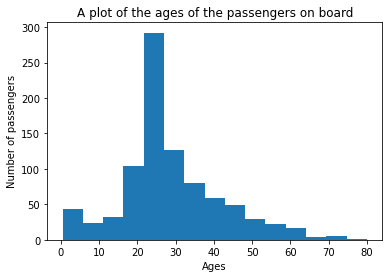

In [24]:
# A plot of the Age column 
plt.hist(cleaned_train_df['Age'], bins=15)
plt.title('A plot of the ages of the passengers on board')
plt.xlabel('Ages')
plt.ylabel('Number of passengers')
plt.show()

#### From the plot, it can be seen that the data is right skewed. This means, most passengers are between the ages of 26-80 years. 

### SibSp Column

In [25]:
# viewing the various elements in this column and their counts
Num_Pass_without_SibSp = cleaned_train_df['SibSp'].value_counts()
Num_Pass_without_SibSp

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

#### The data above shows that, most passengers had  no siblings or spouse on the ship.

### Parch Column

In [26]:
## viewing the various elements in this column and their counts
cleaned_train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### The data above shows that, most passengers had  no parents or children on the ship.

### Fare column

In [27]:
# calculating the average fare that a passenger paid
cleaned_train_df['Fare'].mean()

32.2042079685746

Therefore, the mean value of the fare paid by the passengers is $32.00

In [28]:
# The Maximum fare paid
cleaned_train_df['Fare'].max()

512.3292

In [29]:
# The Minimum fare paid
cleaned_train_df['Fare'].min()

0.0

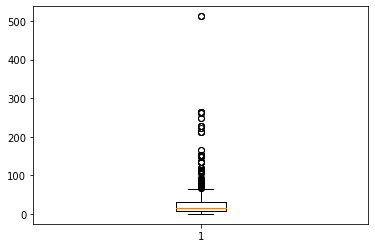

In [30]:
# A plot of the fare paid
plt.boxplot(list(cleaned_train_df['Fare']))
plt.show()

In [31]:
q1, q3 = np.percentile(cleaned_train_df['Fare'],[25, 75])
q1,q3

(7.9104, 31.0)

#### It can be seen that, the middle portion of the fare lies between 7.9104 - 31.0

In [32]:
# Finding the interquartile range of the fare column
IQR = q3-q1
IQR

23.0896

#### The interquartile range for the data is 23.0896. This shows that, the middle portion of the data is spread out further.

# Multivariate Analysis

In [33]:
### Passengers in first class 
Pass_in_1 = cleaned_train_df[cleaned_train_df['Pclass'] == 1]
Pass_in_1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,female,38.0,1,0,71.2833
3,4,1,1,female,35.0,1,0,53.1000
6,7,0,1,male,54.0,0,0,51.8625
11,12,1,1,female,58.0,0,0,26.5500
23,24,1,1,male,28.0,0,0,35.5000
...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542
872,873,0,1,male,33.0,0,0,5.0000
879,880,1,1,female,56.0,0,1,83.1583
887,888,1,1,female,19.0,0,0,30.0000


#### From the table above, it is shown that,  216 passengers were present in the first class.

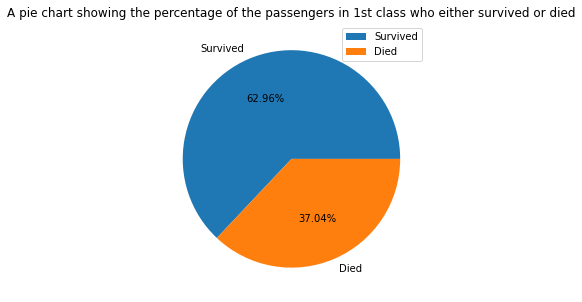

In [34]:
## Passengers in first who class either survived or died
my_labels = ['Survived', 'Died']
plt.figure(figsize=(5,5))
plt.pie(Pass_in_1['Survived'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A pie chart showing the percentage of the passengers in 1st class who either survived or died')
plt.legend()
plt.show()

#### From the plot above, it is shown that, 62.96% of the 216 passengers present in the first class survived and 37.04% died.

In [35]:
### Male passengers in first class 
Male_pass_in_1 = Pass_in_1[Pass_in_1['Sex'] == 'male']
Male_pass_in_1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
6,7,0,1,male,54.0,0,0,51.8625
23,24,1,1,male,28.0,0,0,35.5000
27,28,0,1,male,19.0,3,2,263.0000
30,31,0,1,male,40.0,0,0,27.7208
34,35,0,1,male,28.0,1,0,82.1708
...,...,...,...,...,...,...,...,...
839,840,1,1,male,26.7,0,0,29.7000
857,858,1,1,male,51.0,0,0,26.5500
867,868,0,1,male,31.0,0,0,50.4958
872,873,0,1,male,33.0,0,0,5.0000


#### From the table above, it is shown that, 122 males were present in the first class.

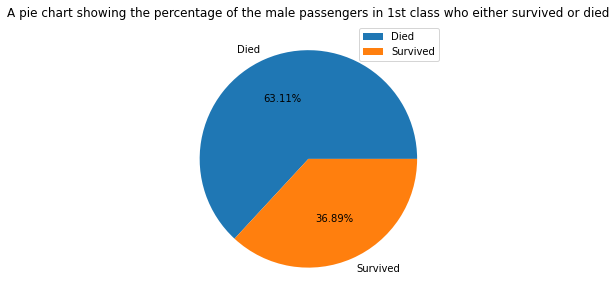

In [36]:
### Male passengers in first class who survived or died
my_labels = ['Died', 'Survived']
plt.figure(figsize=(5,5))
plt.pie(Male_pass_in_1['Survived'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A pie chart showing the percentage of the male passengers in 1st class who either survived or died')
plt.legend()
plt.show()

#### From the plot above, it is shown that, 36.89% of the 122 males present in the first class survived and 63.11% died.

In [37]:
### Female passengers in first class 
Female_pass_in_1 = Pass_in_1[Pass_in_1['Sex'] == 'female']
Female_pass_in_1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,female,38.0,1,0,71.2833
3,4,1,1,female,35.0,1,0,53.1000
11,12,1,1,female,58.0,0,0,26.5500
31,32,1,1,female,26.7,1,0,146.5208
52,53,1,1,female,49.0,1,0,76.7292
...,...,...,...,...,...,...,...,...
856,857,1,1,female,45.0,1,1,164.8667
862,863,1,1,female,48.0,0,0,25.9292
871,872,1,1,female,47.0,1,1,52.5542
879,880,1,1,female,56.0,0,1,83.1583


#### From the table above, it is shown that,  94 ladies were present in the first class.

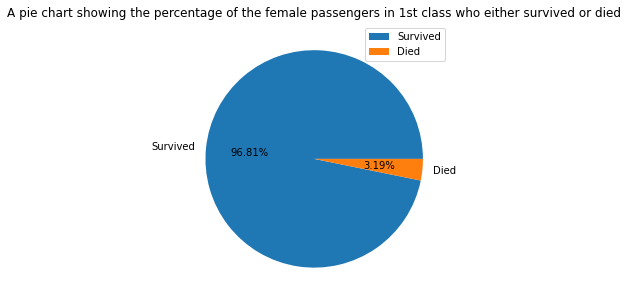

In [38]:
### Female passengers in first class who survived or died
my_labels = ['Survived', 'Died']
plt.figure(figsize=(5,5))
plt.pie(Female_pass_in_1['Survived'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A pie chart showing the percentage of the female passengers in 1st class who either survived or died')
plt.legend()
plt.show()

#### From the plot above, it is shown that, 96.81% of the 94 ladies present in the first class survived and 3.19%.

In [39]:
### Passengers in Second class 
Pass_in_2 = cleaned_train_df[cleaned_train_df['Pclass'] == 2]
Pass_in_2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
9,10,1,2,female,14.0,1,0,30.0708
15,16,1,2,female,55.0,0,0,16.0000
17,18,1,2,male,26.7,0,0,13.0000
20,21,0,2,male,35.0,0,0,26.0000
21,22,1,2,male,34.0,0,0,13.0000
...,...,...,...,...,...,...,...,...
866,867,1,2,female,27.0,1,0,13.8583
874,875,1,2,female,28.0,1,0,24.0000
880,881,1,2,female,25.0,0,1,26.0000
883,884,0,2,male,28.0,0,0,10.5000


#### From the table, it so shown that 184 passengers joined the 2nd class

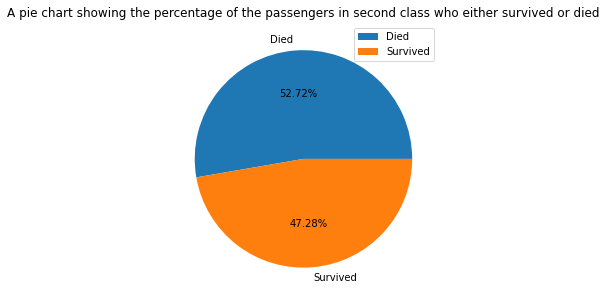

In [40]:
## Passengers in the second class either survived or died
my_labels = ['Died', 'Survived']
plt.figure(figsize=(5,5))
plt.pie(Pass_in_2['Survived'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A pie chart showing the percentage of the passengers in second class who either survived or died')
plt.legend()
plt.show()

#### From the chart above, it is shown that 52.72% of the passengers in second class died and 47.28% survived.

In [41]:
### Male passengers in Second class 
Male_pass_in_2 = Pass_in_2[Pass_in_2['Sex'] == 'male']
Male_pass_in_2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
17,18,1,2,male,26.7,0,0,13.0
20,21,0,2,male,35.0,0,0,26.0
21,22,1,2,male,34.0,0,0,13.0
33,34,0,2,male,66.0,0,0,10.5
70,71,0,2,male,32.0,0,0,10.5
...,...,...,...,...,...,...,...,...
848,849,0,2,male,28.0,0,1,33.0
861,862,0,2,male,21.0,1,0,11.5
864,865,0,2,male,24.0,0,0,13.0
883,884,0,2,male,28.0,0,0,10.5


#### The table above shows that, 108 male passengers joined the second class.

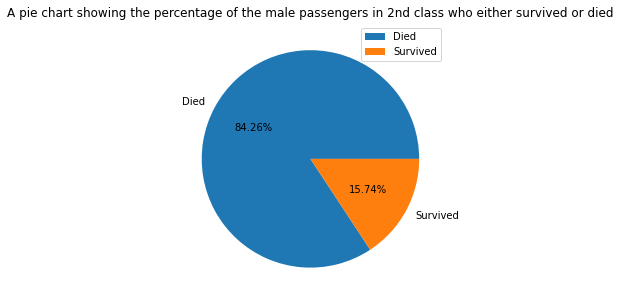

In [42]:
### Male passengers in Second class who survived or died
my_labels = ['Died', 'Survived']
plt.figure(figsize=(5,5))
plt.pie(Male_pass_in_2['Survived'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A pie chart showing the percentage of the male passengers in 2nd class who either survived or died')
plt.legend()
plt.show()

#### From the chart above, it is shown that 84.26% of the males present in the second class died and 15.74% Survived.

In [43]:
### Female passengers in Second class 
Female_pass_in_2 = Pass_in_2[Pass_in_2['Sex'] == 'female']
Female_pass_in_2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
9,10,1,2,female,14.0,1,0,30.0708
15,16,1,2,female,55.0,0,0,16.0000
41,42,0,2,female,27.0,1,0,21.0000
43,44,1,2,female,3.0,1,2,41.5792
53,54,1,2,female,29.0,1,0,26.0000
...,...,...,...,...,...,...,...,...
854,855,0,2,female,44.0,1,0,26.0000
865,866,1,2,female,42.0,0,0,13.0000
866,867,1,2,female,27.0,1,0,13.8583
874,875,1,2,female,28.0,1,0,24.0000


#### The table shows that, there were 76 female passengers who joined the second class.

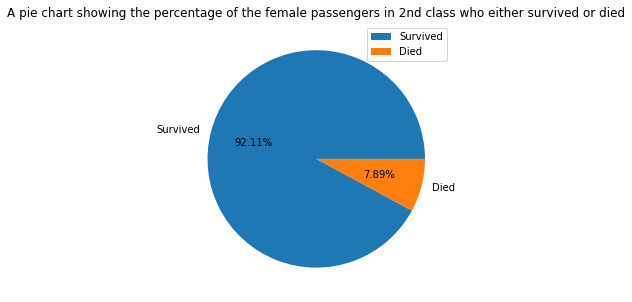

In [44]:
### Female passengers in second class who survived or died
my_labels = ['Survived', 'Died']
plt.figure(figsize=(5,5))
plt.pie(Female_pass_in_2['Survived'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A pie chart showing the percentage of the female passengers in 2nd class who either survived or died')
plt.legend()
plt.show()

In [45]:
### Passengers in third class 
Pass_in_3 = cleaned_train_df[cleaned_train_df['Pclass'] == 3]
Pass_in_3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
2,3,1,3,female,26.0,0,0,7.9250
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,26.7,0,0,8.4583
7,8,0,3,male,2.0,3,1,21.0750
...,...,...,...,...,...,...,...,...
882,883,0,3,female,22.0,0,0,10.5167
884,885,0,3,male,25.0,0,0,7.0500
885,886,0,3,female,39.0,0,5,29.1250
888,889,0,3,female,26.7,1,2,23.4500


#### From the table above, it is shown that 491 passengers joined the 3rd class.

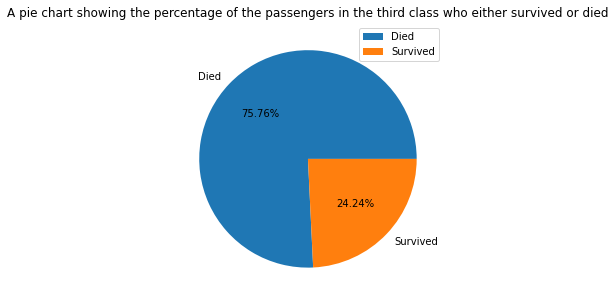

In [46]:
## Passengers in the Third class either survived or died
my_labels = ['Died', 'Survived']
plt.figure(figsize=(5,5))
plt.pie(Pass_in_3['Survived'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A pie chart showing the percentage of the passengers in the third class who either survived or died')
plt.legend()
plt.show()

#### From the chart above, it is shown that 75.76% of the passengers in the third class died and 24.24% survived.

In [47]:
### Male passengers in third class 
Male_pass_in_3 = Pass_in_3[Pass_in_3['Sex'] == 'male']
Male_pass_in_3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,26.7,0,0,8.4583
7,8,0,3,male,2.0,3,1,21.0750
12,13,0,3,male,20.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
877,878,0,3,male,19.0,0,0,7.8958
878,879,0,3,male,26.7,0,0,7.8958
881,882,0,3,male,33.0,0,0,7.8958
884,885,0,3,male,25.0,0,0,7.0500


#### From the table above, it so shown that 347 males joined the third class.

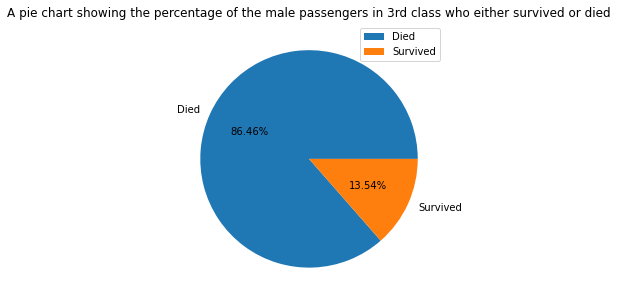

In [48]:
### Male passengers in third class who survived or died
my_labels = ['Died', 'Survived']
plt.figure(figsize=(5,5))
plt.pie(Male_pass_in_3['Survived'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A pie chart showing the percentage of the male passengers in 3rd class who either survived or died')
plt.legend()
plt.show()

#### It is shown from the chart above that, 86.46% of the males in the 3rd class died and 13.54% survived.

In [49]:
### Female passengers in third class 
Female_pass_in_3 = Pass_in_3[Pass_in_3['Sex'] == 'female']
Female_pass_in_3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
2,3,1,3,female,26.0,0,0,7.9250
8,9,1,3,female,27.0,0,2,11.1333
10,11,1,3,female,4.0,1,1,16.7000
14,15,0,3,female,14.0,0,0,7.8542
18,19,0,3,female,31.0,1,0,18.0000
...,...,...,...,...,...,...,...,...
863,864,0,3,female,26.7,8,2,69.5500
875,876,1,3,female,15.0,0,0,7.2250
882,883,0,3,female,22.0,0,0,10.5167
885,886,0,3,female,39.0,0,5,29.1250


#### It is shown from the table above that, 144 female passengers joined the third class

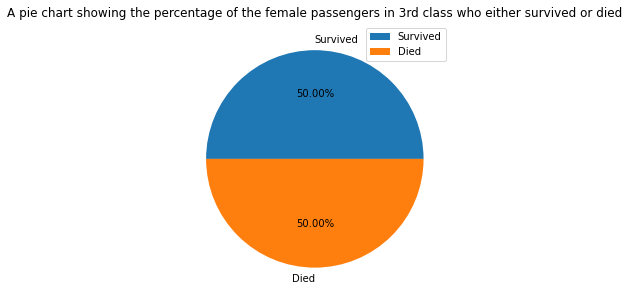

In [50]:
### Female passengers in third class who survived or died
my_labels = ['Survived', 'Died']
plt.figure(figsize=(5,5))
plt.pie(Female_pass_in_3['Survived'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A pie chart showing the percentage of the female passengers in 3rd class who either survived or died')
plt.legend()
plt.show()

#### From the chart above, it is shown that 50% of the 144 females present in the 3rd class survived and 50% died.

### Fare and Pclass columns

In [51]:
## Average fare of people in the each class
Avg_fare_1 = Pass_in_1['Fare'].mean()
Avg_fare_2 = Pass_in_2['Fare'].mean()
Avg_fare_3 = Pass_in_3['Fare'].mean()

Avg_fare_df = pd.DataFrame({'Class':['1st', '2nd', '3rd'],
                           'Avg_fare': [Avg_fare_1, Avg_fare_2, Avg_fare_3]}
                          )
Avg_fare_df

,Class,Avg_fare
0,1st,84.154687
1,2nd,20.662183
2,3rd,13.675550


#### The table above shows the average fare a passenger paid for each of the classes. 
#### The average fare paid by passengers in the 1st class is way higher. Hence, the number of people who joined are not that much as compared to the third class. Also, the survival rate of the passengers in the first class is high, which means that, the first class provided a better condition of services such as the readily available and enough emergency equipments in case of an emergency.
#### The average fare paid by passengers in the 2nd class is realtively higher than that of the third class. Hence, many passengers preferred the best condition of service or what they can afford. Only a few passengers joined the second class. The number of deaths recorded pn the second class is ralatively lower than that of the third class.
#### The 3rd class recorded its average fare to be the lowest. Hence, most passengers joined the third class because,  it was relatively lower in cost. The third class column recorded the highest number of deaths because of its poor condition of service. Emergency equipments were not enough.

### Survived and Age Column

In [52]:
# Average Age of passengers who survived and passengers who died

pass_survived = cleaned_train_df[cleaned_train_df['Survived'] == 1]
pass_sur_age = pass_survived['Age'].mean()

pass_died = cleaned_train_df[cleaned_train_df['Survived'] == 0]
pass_died_age = pass_died['Age'].mean()

Avg_age_sur_or_died = pd.DataFrame({'State':['Survived', 'Died'],
                                   'Avg_age': [pass_sur_age, pass_died_age]}
                                  )
Avg_age_sur_or_died

,State,Avg_age
0,Survived,28.093772
1,Died,29.732240


In [53]:
# viewing standard deviation of the avge of survivors and non-survivors
sur_std = pass_survived['Age'].std()

died_std = pass_died['Age'].std()

print('The standard deviation for the survivors is: '  +  str(sur_std))
print('The standard deviation for the non-survivors is: '  +  str(died_std))

The standard deviation for the survivors is: 13.776555506557171
The standard deviation for the non-survivors is: 12.559866809717809


#### The table above shows that, the average age of people who died is approximately 30 years and that of those who survived is 28 years. This shows that, most teenagers survived. Those who died were mostly males above the 17 years.

# Machine Learning Model

In [54]:
# repacing male with 0 and female with 1. Thus, preparing the data for machine learning
cleanup_nums = {'Sex': {'male':0, 'female':1}}
cleaned_train_df = cleaned_train_df.replace(cleanup_nums)

In [55]:
# naming the survived column as y
y = cleaned_train_df['Survived']

In [56]:
# Naming all other columns as x
x = cleaned_train_df.drop('Survived', axis = 1)

In [57]:
# Split the data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 10)

In [58]:
# import Decision tree model
model = DecisionTreeClassifier()

In [59]:
# Fitting the data into the imported model
fit_model = model.fit(x_train, y_train)
fit_model

DecisionTreeClassifier()

In [60]:
# showing the mean squared error between the the original y_values and the predicted y values
mse = mean_squared_error(y_test, model.predict(x_test))
print('The mean sqaured error (MSE) on test set is: {:.4f}'.format(mse))

The mean sqaured error (MSE) on test set is: 0.2090


In [61]:
# Testing our model
model_test = fit_model.predict(x_test)
model_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

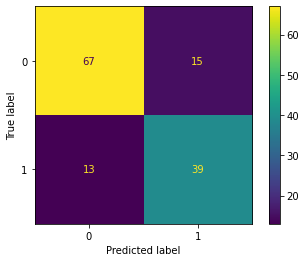

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, model_test)
cm = ConfusionMatrixDisplay(confusion_matrix=cm)
cm.plot()
plt.show()

In [63]:
# printing the original values of y
org_values = np.array(y_test)
org_values

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1], dtype=int64)

In [64]:
# Accuracy of the model
print('The accuracy score of the model is: {:.4f}'.format(accuracy_score(org_values, model_test)))

The accuracy score of the model is: 0.7910


In [65]:
# test the model on the new data set
test_df_new = test_df.copy()
test_df_new = test_df_new.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [66]:
# replacing male with 0 and female with 1. Thus, preparing the data for machine learning
cleanup_test_nums = {'Sex': {'male':0, 'female':1}}
cleaned_test_df = test_df_new.replace(cleanup_test_nums)

In [67]:
# fill null values in the age column with the mean age
cleaned_test_df.fillna(26.7, inplace = True)

In [68]:
# viewing the new data set
new_x = cleaned_test_df
new_x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,0,26.7,0,0,8.0500
414,1306,1,1,39.0,0,0,108.9000
415,1307,3,0,38.5,0,0,7.2500
416,1308,3,0,26.7,0,0,8.0500


In [69]:
# checking for null values
new_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [70]:
# Predicting answers of the test data
predictions = model.predict(new_x)

In [71]:
# viewing predicted values
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [72]:
# saving the final data frame
final_df = pd.DataFrame(new_x['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('Predictions.csv', index = False)

In [73]:
# viewing the saved data set
final_df.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [74]:
# saving the model into a pickel format
joblib.dump(model, 'titanic.pkl')

['titanic.pkl']

In [75]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,26.7,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000
